In [1]:
import sys
import os
import numpy as np
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path + "/src/simulations_v2")
from load_params import load_multigroup_params
from multi_group_dorm_simulation import MultiGroupDormSimulation

In [2]:
dorm_sim = MultiGroupDormSimulation(
            num_dorms=100,
            dorm_population=8000,
            non_dorm_population=26000,
            intra_dorm_contacts=10, # 10 contacts/day within each dorm
            inter_dorm_contacts=10, #10 contacts/day with other people in dorms
            intra_non_dorm_contacts=3, # each person in a dorm has this many contacts/day with person not in a dorm
            inter_non_dorm_contacts=7.3, #contacts/day within non-dorm community
            dorm_test_rate=0.5, # daily test rate within dorms
            non_dorm_test_rate=0.2, #daily test rate in non-dorm
            quarantine_contacts_multiplier=0.1, # multiply contacts/day rates by this after dorm is quarantined
            quarantine_test_fraction=1.0, # test fraction after dorm goes into quarantine
            dorm_outside_infection_p=0, # outside infection probability for people in dorms
            initial_dorm_prevalence = 0 # initial prevalence (percentage) in the dorms
)

In [3]:
import copy
cs = []
dorm_sims = []
for _ in range(1):
    sim = copy.deepcopy(dorm_sim)
    cs.append(sim.run_new_trajectory(50))
    dorm_sims.append(sim)
    print("done new trajectory")

done new trajectory


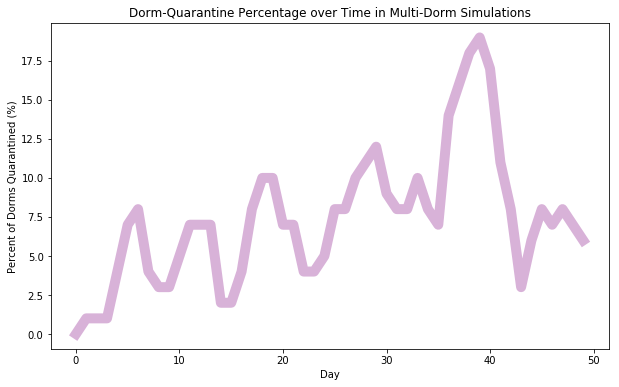

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
xs = list(range(50))
plt.figure(figsize=(10,6))
for c in cs:
    plt.plot(xs, c, color='purple', alpha=0.3, linewidth=10)
plt.xlabel("Day")
plt.ylabel("Percent of Dorms Quarantined (%)")
plt.title("Dorm-Quarantine Percentage over Time in Multi-Dorm Simulations")
plt.show()

Text(0.5,1,'Infection Percentage over Time in Multi-Dorm Simulations with Dorm-Level Quarantine')

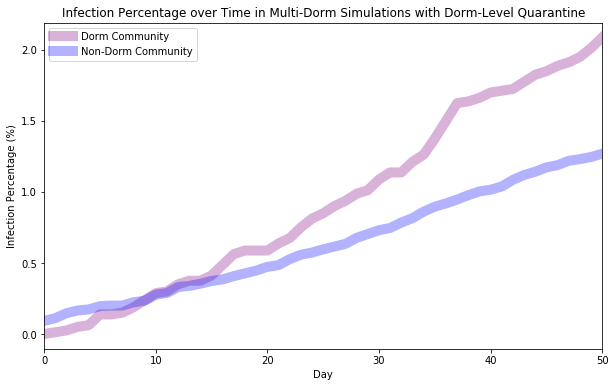

In [5]:
def get_popsize(df):
    cols = df.columns
    subdf = df[[col for col in cols if 'cumulative' not in col]]
    return subdf.sum(axis=1).iloc[0]

def infection_pct(df):
    popsize = get_popsize(df)
    
    subdf = df[['cumulative_mild', 'cumulative_severe']]
    infections = subdf.sum(axis=1).iloc[-1]
    
    return infections / popsize * 100

def add_df_plot(df, label, color, alpha=0.1, linewidth=10):
    popsize = get_popsize(df)
    df[['S', 'QS']].apply(lambda x: (popsize - sum(x)) / popsize * 100, axis=1) \
                        .plot(label=label, alpha=alpha, linewidth=linewidth, color=color)
        
import numpy as np
plt.figure(figsize=(10,6))
dorm_label='Dorm Community'
non_dorm_label = 'Non-Dorm Community'
for sim in dorm_sims:
    dorm_df = sim.sims[0].sim_df
    for i in range(1,100):
        dorm_df = dorm_df.add(sim.sims[i].sim_df)
    add_df_plot(dorm_df, label=dorm_label, color='purple', alpha=0.3, linewidth=10)
    add_df_plot(sim.sims[100].sim_df, label=non_dorm_label, color='blue', alpha=0.3, linewidth=10)
    dorm_label=''
    non_dorm_label=''
plt.xlabel("Day")
plt.ylabel("Infection Percentage (%)")
plt.legend()
plt.title("Infection Percentage over Time in Multi-Dorm Simulations with Dorm-Level Quarantine")

In [7]:
sim.interaction_matrix[100,100]

3.0

In [9]:
dorm_sim.interaction_matrix[100,1]

0.02246153846153846

In [10]:
sim.interaction_matrix[100,1]

7.300000000000001

In [2]:
dorm_sim = MultiGroupDormSimulation(
            num_dorms=100,
            dorm_population=8000,
            non_dorm_population=26000,
            intra_dorm_contacts=10, # 10 contacts/day within each dorm
            inter_dorm_contacts=10, #10 contacts/day with other people in dorms
            intra_non_dorm_contacts=3, # each person in a dorm has this many contacts/day with person not in a dorm
            inter_non_dorm_contacts=7.3, #contacts/day within non-dorm community
            dorm_test_rate=0.5, # daily test rate within dorms
            non_dorm_test_rate=0.2, #daily test rate in non-dorm
            quarantine_contacts_multiplier=0.1, # multiply contacts/day rates by this after dorm is quarantined
            quarantine_test_fraction=1.0, # test fraction after dorm goes into quarantine
            dorm_outside_infection_p=None, # outside infection probability for people in dorms
            initial_dorm_prevalence = 0 # initial prevalence (percentage) in the dorms
)

In [3]:
import copy
cs = []
dorm_sims = []
for _ in range(1):
    sim = copy.deepcopy(dorm_sim)
    cs.append(sim.run_new_trajectory(50))
    dorm_sims.append(sim)
    print("done new trajectory")

done new trajectory


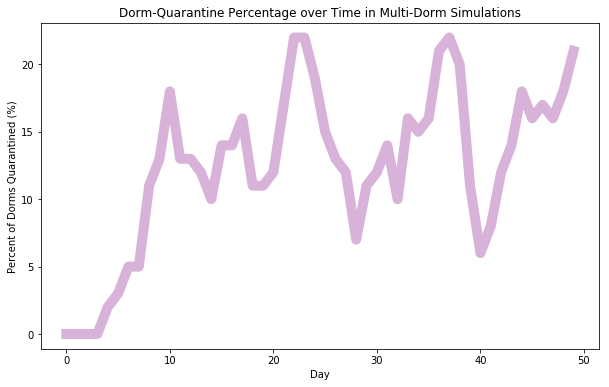

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
xs = list(range(50))
plt.figure(figsize=(10,6))
for c in cs:
    plt.plot(xs, c, color='purple', alpha=0.3, linewidth=10)
plt.xlabel("Day")
plt.ylabel("Percent of Dorms Quarantined (%)")
plt.title("Dorm-Quarantine Percentage over Time in Multi-Dorm Simulations")
plt.show()

Text(0.5,1,'Infection Percentage over Time in Multi-Dorm Simulations with Dorm-Level Quarantine')

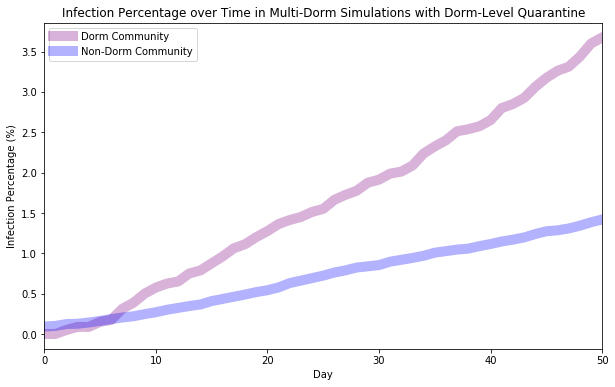

In [5]:
def get_popsize(df):
    cols = df.columns
    subdf = df[[col for col in cols if 'cumulative' not in col]]
    return subdf.sum(axis=1).iloc[0]

def infection_pct(df):
    popsize = get_popsize(df)
    
    subdf = df[['cumulative_mild', 'cumulative_severe']]
    infections = subdf.sum(axis=1).iloc[-1]
    
    return infections / popsize * 100

def add_df_plot(df, label, color, alpha=0.1, linewidth=10):
    popsize = get_popsize(df)
    df[['S', 'QS']].apply(lambda x: (popsize - sum(x)) / popsize * 100, axis=1) \
                        .plot(label=label, alpha=alpha, linewidth=linewidth, color=color)
        
import numpy as np
plt.figure(figsize=(10,6))
dorm_label='Dorm Community'
non_dorm_label = 'Non-Dorm Community'
for sim in dorm_sims:
    dorm_df = sim.sims[0].sim_df
    for i in range(1,100):
        dorm_df = dorm_df.add(sim.sims[i].sim_df)
    add_df_plot(dorm_df, label=dorm_label, color='purple', alpha=0.3, linewidth=10)
    add_df_plot(sim.sims[100].sim_df, label=non_dorm_label, color='blue', alpha=0.3, linewidth=10)
    dorm_label=''
    non_dorm_label=''
plt.xlabel("Day")
plt.ylabel("Infection Percentage (%)")
plt.legend()
plt.title("Infection Percentage over Time in Multi-Dorm Simulations with Dorm-Level Quarantine")

In [6]:
dorm_sim = MultiGroupDormSimulation(
            num_dorms=100,
            dorm_population=8000,
            non_dorm_population=26000,
            intra_dorm_contacts=10, # 10 contacts/day within each dorm
            inter_dorm_contacts=10, #10 contacts/day with other people in dorms
            intra_non_dorm_contacts=3, # each person in a dorm has this many contacts/day with person not in a dorm
            inter_non_dorm_contacts=7.3, #contacts/day within non-dorm community
            dorm_test_rate=0.2, # daily test rate within dorms
            non_dorm_test_rate=0.2, #daily test rate in non-dorm
            quarantine_contacts_multiplier=0.1, # multiply contacts/day rates by this after dorm is quarantined
            quarantine_test_fraction=1.0, # test fraction after dorm goes into quarantine
            dorm_outside_infection_p=0, # outside infection probability for people in dorms
            initial_dorm_prevalence = 0 # initial prevalence (percentage) in the dorms
)

In [7]:
import copy
cs = []
dorm_sims = []
for _ in range(1):
    sim = copy.deepcopy(dorm_sim)
    cs.append(sim.run_new_trajectory(50))
    dorm_sims.append(sim)
    print("done new trajectory")

done new trajectory


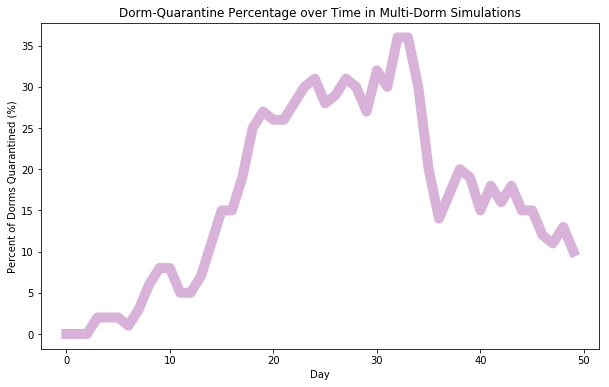

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
xs = list(range(50))
plt.figure(figsize=(10,6))
for c in cs:
    plt.plot(xs, c, color='purple', alpha=0.3, linewidth=10)
plt.xlabel("Day")
plt.ylabel("Percent of Dorms Quarantined (%)")
plt.title("Dorm-Quarantine Percentage over Time in Multi-Dorm Simulations")
plt.show()


Text(0.5,1,'Infection Percentage over Time in Multi-Dorm Simulations with Dorm-Level Quarantine')

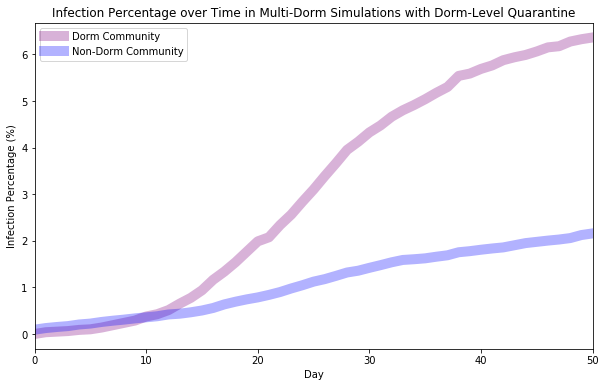

In [9]:
def get_popsize(df):
    cols = df.columns
    subdf = df[[col for col in cols if 'cumulative' not in col]]
    return subdf.sum(axis=1).iloc[0]

def infection_pct(df):
    popsize = get_popsize(df)
    
    subdf = df[['cumulative_mild', 'cumulative_severe']]
    infections = subdf.sum(axis=1).iloc[-1]
    
    return infections / popsize * 100

def add_df_plot(df, label, color, alpha=0.1, linewidth=10):
    popsize = get_popsize(df)
    df[['S', 'QS']].apply(lambda x: (popsize - sum(x)) / popsize * 100, axis=1) \
                        .plot(label=label, alpha=alpha, linewidth=linewidth, color=color)
        
import numpy as np
plt.figure(figsize=(10,6))
dorm_label='Dorm Community'
non_dorm_label = 'Non-Dorm Community'
for sim in dorm_sims:
    dorm_df = sim.sims[0].sim_df
    for i in range(1,100):
        dorm_df = dorm_df.add(sim.sims[i].sim_df)
    add_df_plot(dorm_df, label=dorm_label, color='purple', alpha=0.3, linewidth=10)
    add_df_plot(sim.sims[100].sim_df, label=non_dorm_label, color='blue', alpha=0.3, linewidth=10)
    dorm_label=''
    non_dorm_label=''
plt.xlabel("Day")
plt.ylabel("Infection Percentage (%)")
plt.legend()
plt.title("Infection Percentage over Time in Multi-Dorm Simulations with Dorm-Level Quarantine")